##  Bear Market Indicator

- Can we develop a bear market indicator so that we can get out of the market in time?

- The idea I had was that during/before bear markets, the volatility in the market goes up.

- The fluctuations are usually very high (>1%) on an every day basis on indices like NASDAQ and S&P


In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import bokeh.plotting as bp


In [2]:
# Sample data file - Nasdaq index 
stock = "nasdaq"
df = pd.read_csv(stock+'.csv')
print df.dtypes
ts = df['Adj Close']
ts.index = pd.to_datetime(df.Date)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


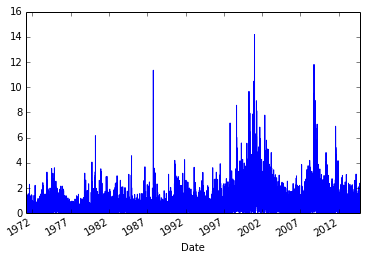

In [3]:
# Calculate percentage increment in the value compareded to the 
# previous day
perc_inc = np.abs((ts.diff()/ts)*100.0)[1:]
perc_inc = perc_inc.apply(lambda x: x)        

# plot data
perc_inc.plot()

### Compare The above plot to one below.

- Volatility goes up great deal before and during bear markets.
- This was the first clue for me to dig further.

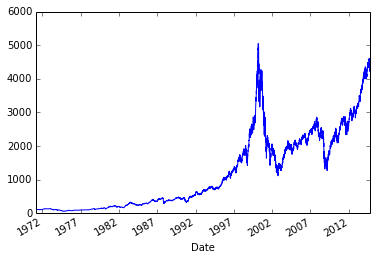

In [4]:
# Adjusted Close values plotted
ts.plot()

#### Number of volatile days in a month

- Calculated number of volatile days in a month
- In particular, compare that to the average volatility

I use two curoffs (a,b) within which the volatility should be to be counted.
After some insight I decided to use a to be the average fluctuation + 1 (integer value)
and b to be a+1.

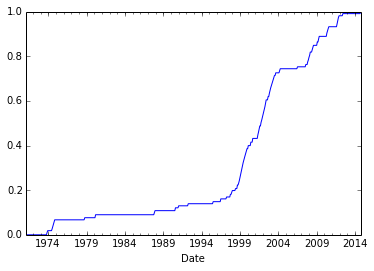

In [5]:
# Calculate the monthly average of high volatility days
monthly_avg = perc_inc.resample('M')
m = monthly_avg.mean()

# define a,b to based on the average fluctuation
a = int(m) + 1
b = a + 1

for i in range(0,len(monthly_avg)):
    if monthly_avg[i] < a or monthly_avg[i] > b:
        monthly_avg[i] = 0

# Calculate the cummulative sum every month
monthly_avg = monthly_avg.cumsum()
# Normalized values between (0,1)
monthly_avg = monthly_avg/np.max(monthly_avg)

# plot
monthly_avg.plot()

### May be there is something here!!

- Seems like the slope of the cummulative sum of the volatility every month can be a great indicator.
- In regular bull markets the slope is small, but in volatile markets/bear markets the indicator raises steeply.


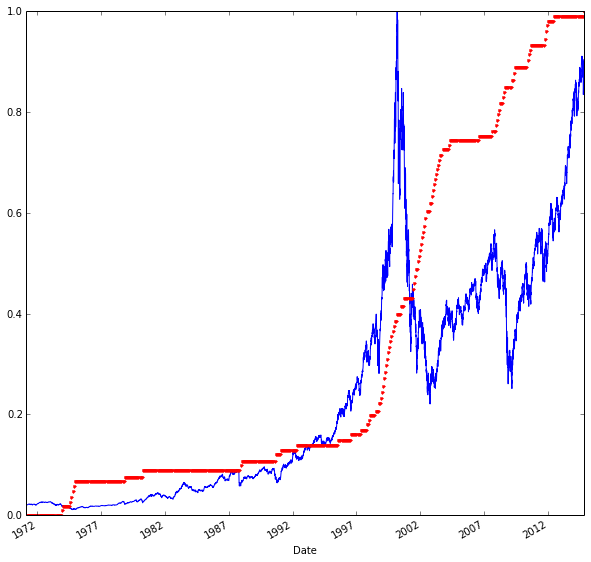

In [23]:
# Compare the value to the actual stock value 

close = df['Adj Close'][1:]
close.index = perc_inc.index

# Normalized close values between (0,1)
close = close/np.max(close)
fig = plt.figure(figsize=(10,10))

close.plot(color='blue')
monthly_avg.plot(color='red',style='.k')
slope_indicator = monthly_avg.diff(periods=12)
slope_indicator = slope_indicator/np.max(slope_indicator)

### Bokeh  html files 
bp.output_file(stock+".html", title=stock)
TOOLS = "pan,wheel_zoom,box_zoom,reset,resize"
p1 = bp.figure(x_axis_type="datetime", tools=TOOLS, plot_width=800, toolbar_location="above")
p1.line(close.index,close,legend="Close ($)")
p1.line(monthly_avg.index,monthly_avg,line_color="#0000FF",legend="Indicator")
p1.line(slope_indicator.index,slope_indicator,line_color="#F2583E",legend="slope of Indicator")
p1.grid.grid_line_alpha=0.3
p1.title = stock
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Normalized Values"
p1.legend.orientation = "top_left"
bp.save(p1)
